<a href="https://colab.research.google.com/github/pandaJam/Time-series-analysis-using-Deep-learning/blob/main/time_series%20-%20simple%20sine%20wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -q tensorflow-gpu

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.8, size=len(time))

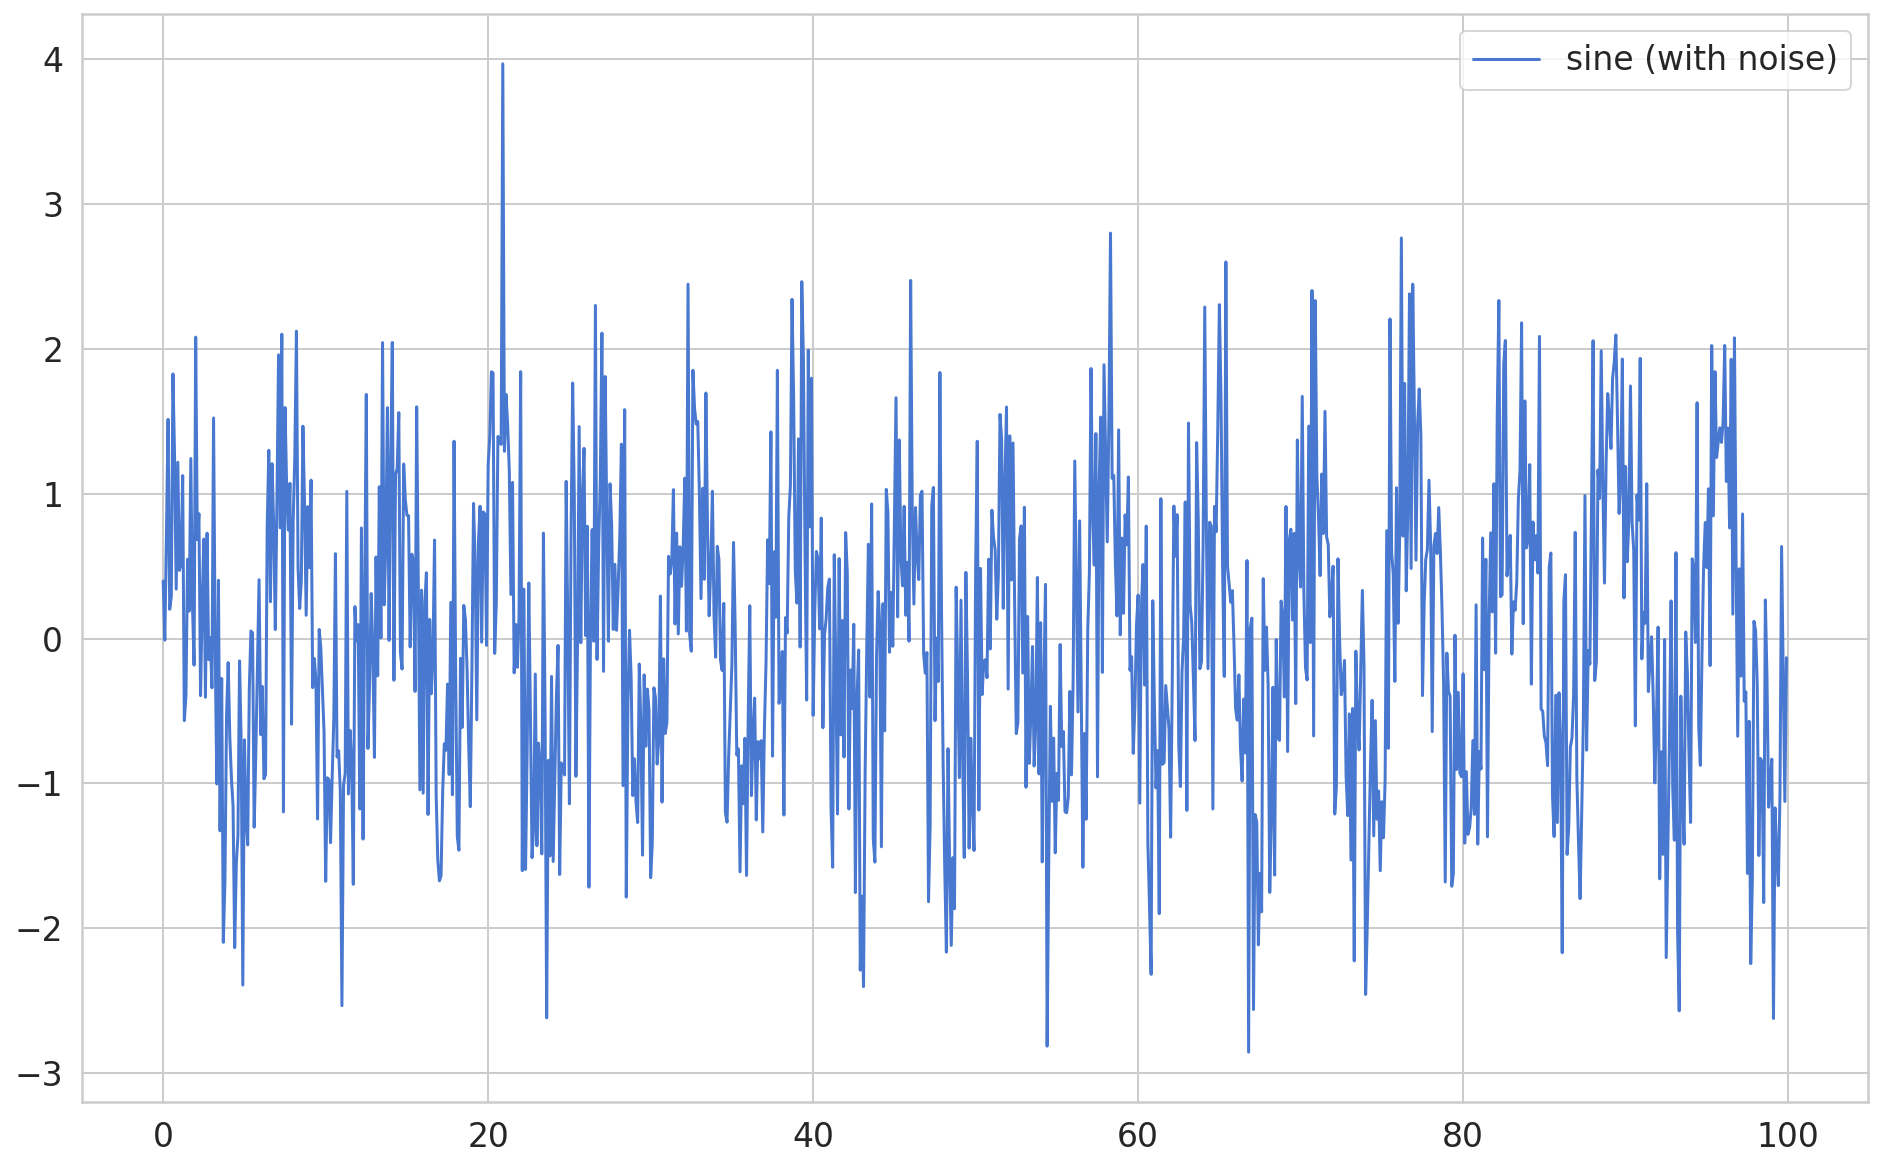

In [4]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

# Data Preprocessing

In [5]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.397371
0.1,-0.010778
0.2,0.716820
0.3,1.513944
0.4,0.202096


In [6]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [7]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

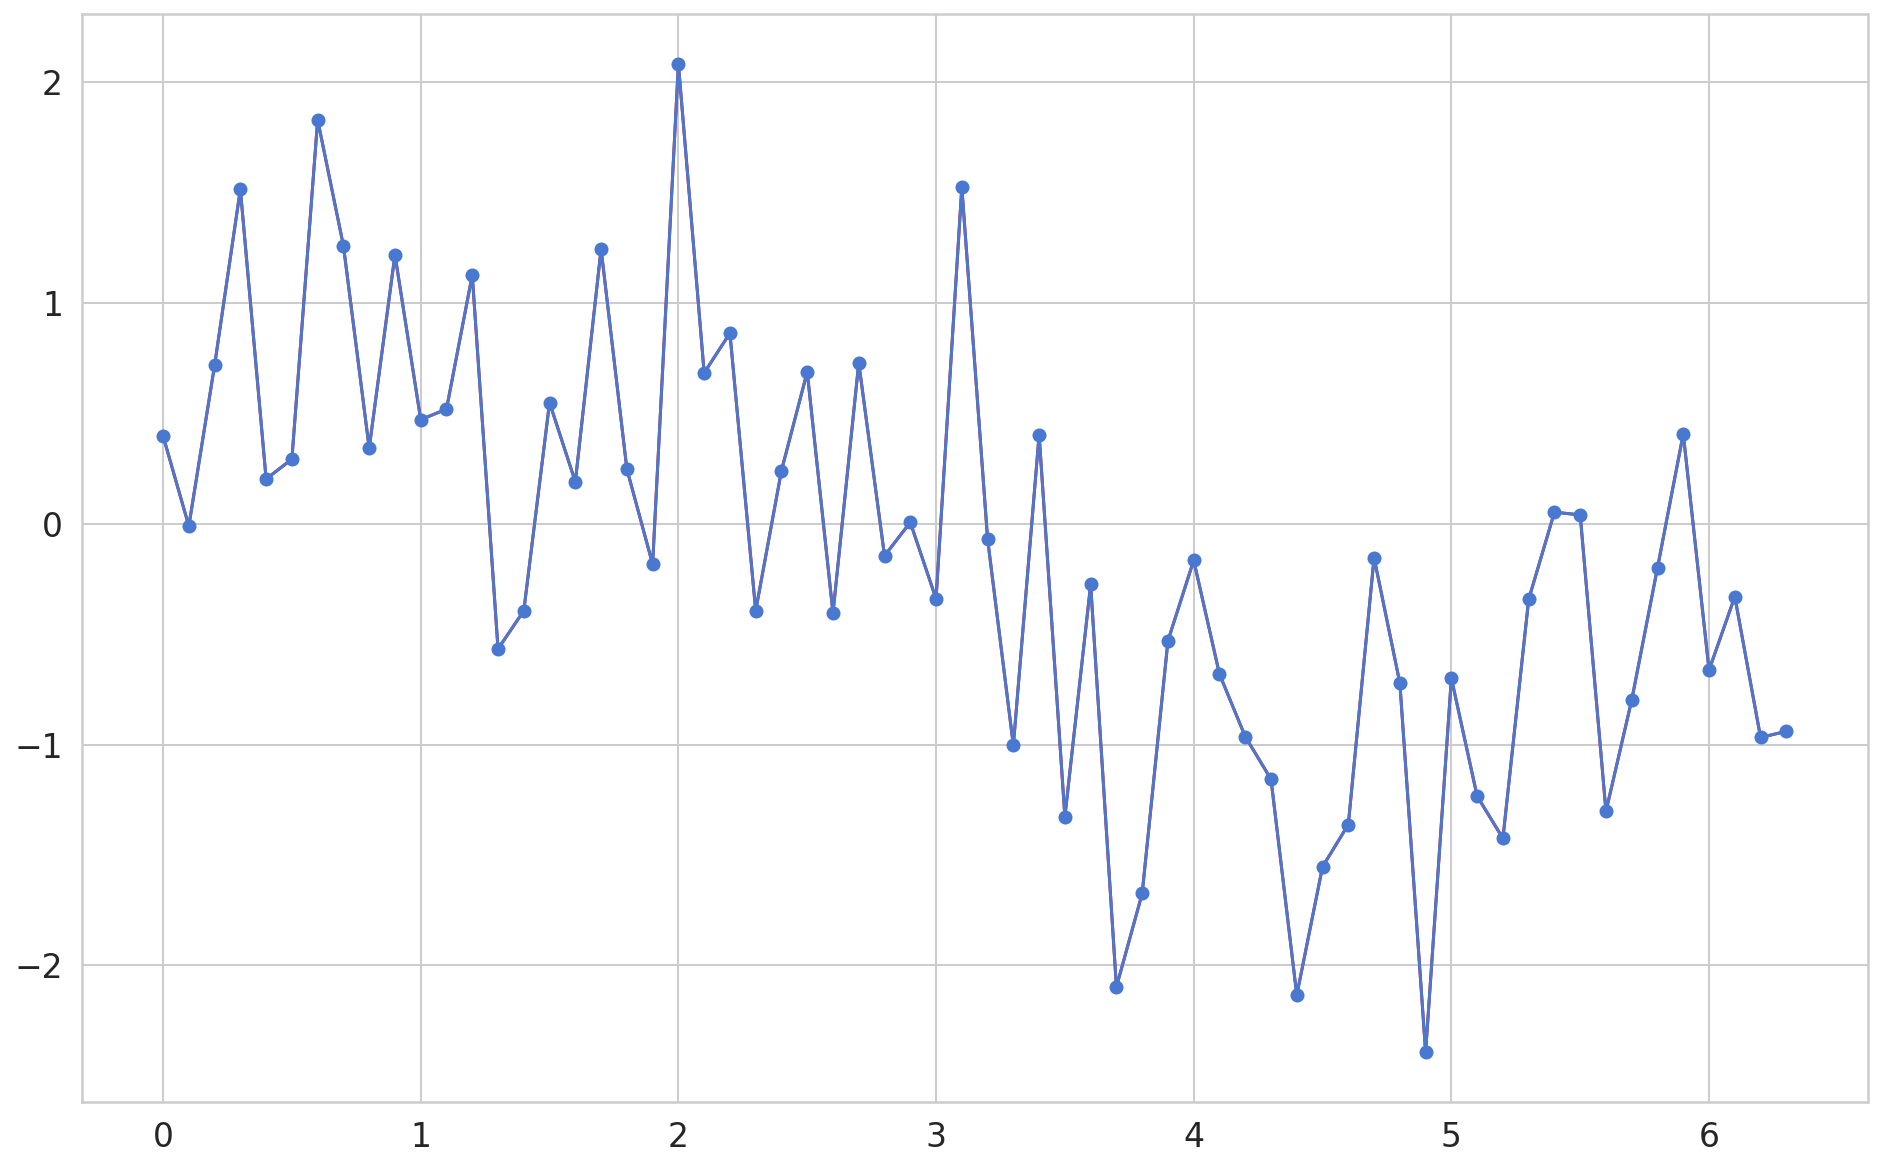

In [8]:
train.iloc[0:10] , 
plt.plot(train.iloc[0:64],'red')
plt.plot(train.iloc[0:64].sine,marker = 'o',color = 'b')

In [9]:
time_steps = 64

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(736, 64, 1) (736,)


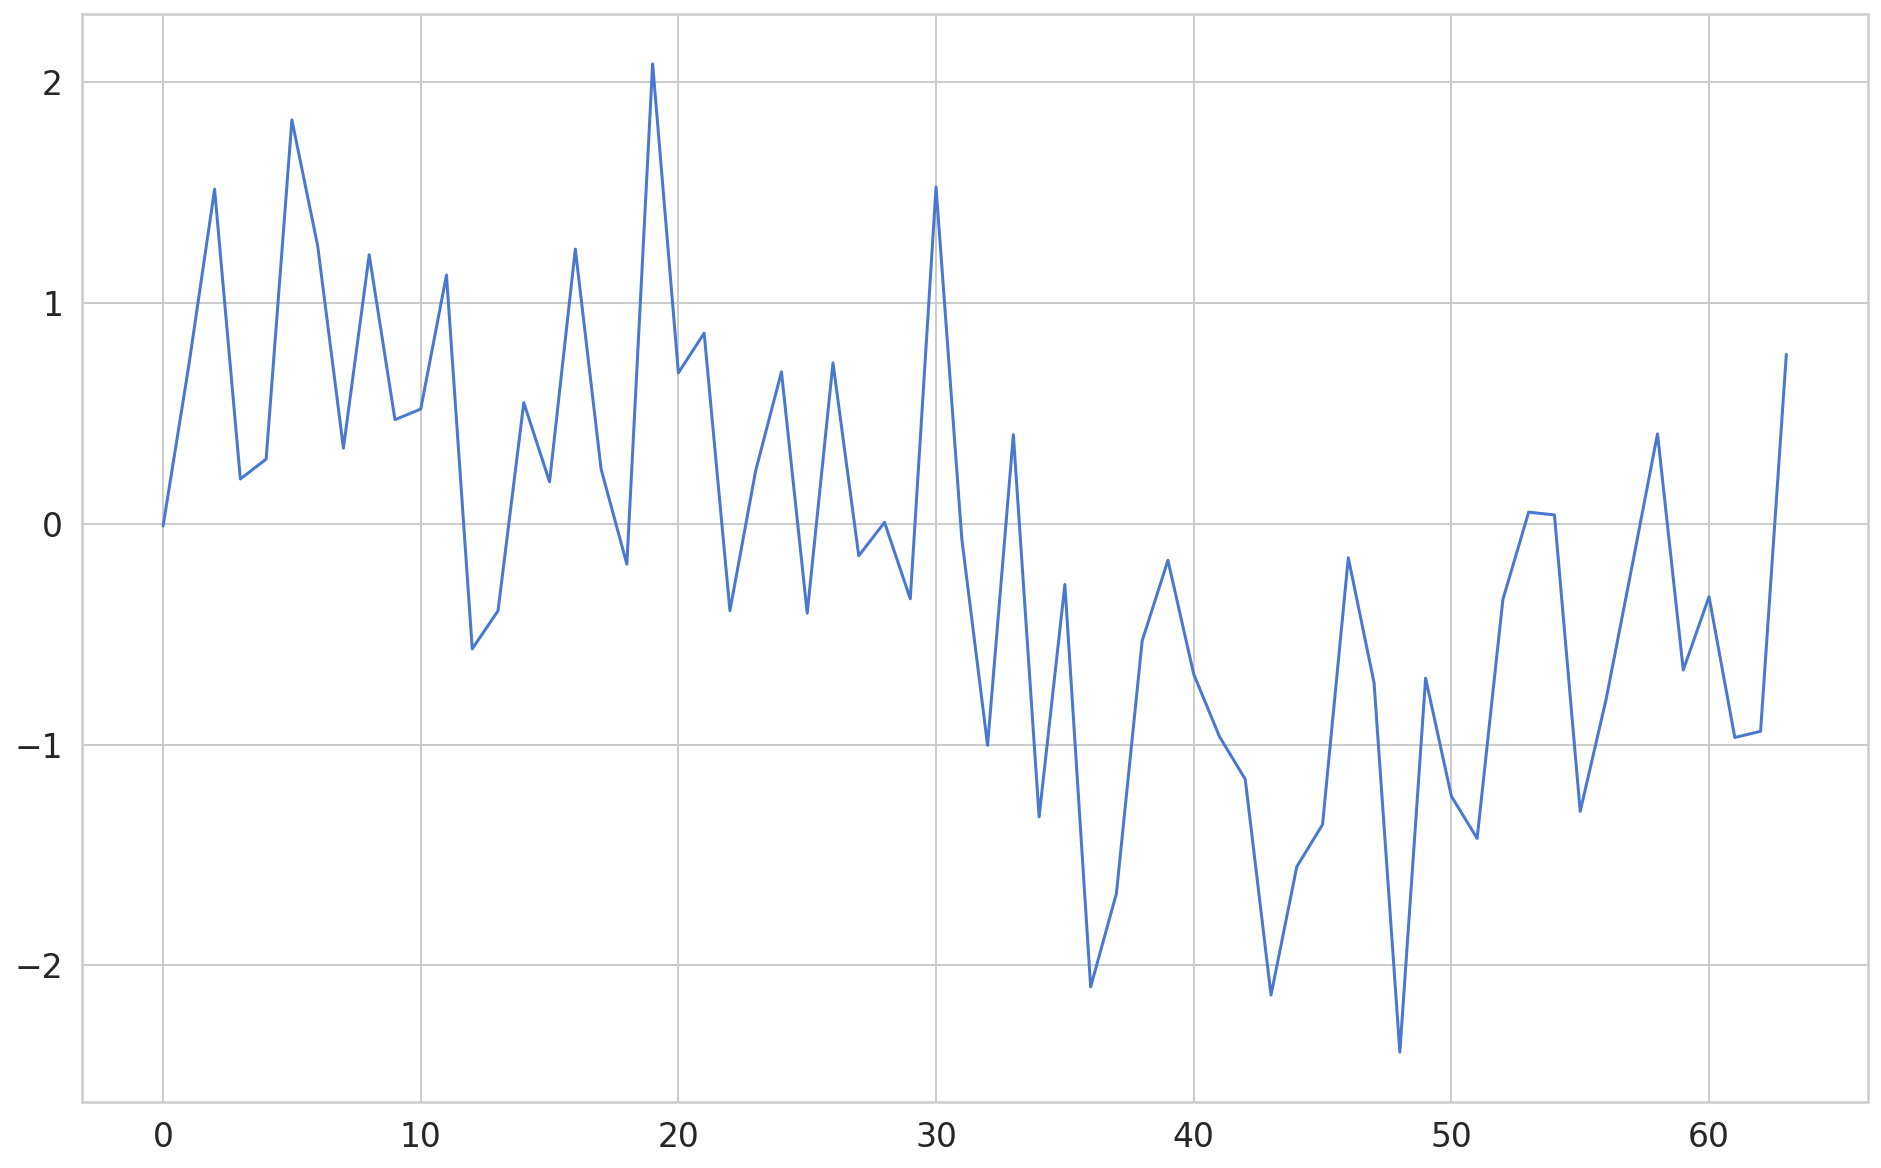

In [10]:
plt.plot(X_train[1])#, y_train[0]))#

# Modeling

In [11]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))#, return_sequences = True))
# model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.Adam(0.001))

## Training

In [12]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Epoch 1/30
21/21 [==============================] - 0s 22ms/step - loss: 0.7345 - val_loss: 0.6479
Epoch 2/30
21/21 [==============================] - 0s 7ms/step - loss: 0.6766 - val_loss: 0.6552
Epoch 3/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6605 - val_loss: 0.6370
Epoch 4/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6534 - val_loss: 0.6521
Epoch 5/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6474 - val_loss: 0.6431
Epoch 6/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6459 - val_loss: 0.6418
Epoch 7/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6456 - val_loss: 0.6377
Epoch 8/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6447 - val_loss: 0.6462
Epoch 9/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6411 - val_loss: 0.6424
Epoch 10/30
21/21 [==============================] - 0s 5ms/step - loss: 0.6348 - val_loss: 0.6468
Epoch 11/30
21/21 

## Evaluation

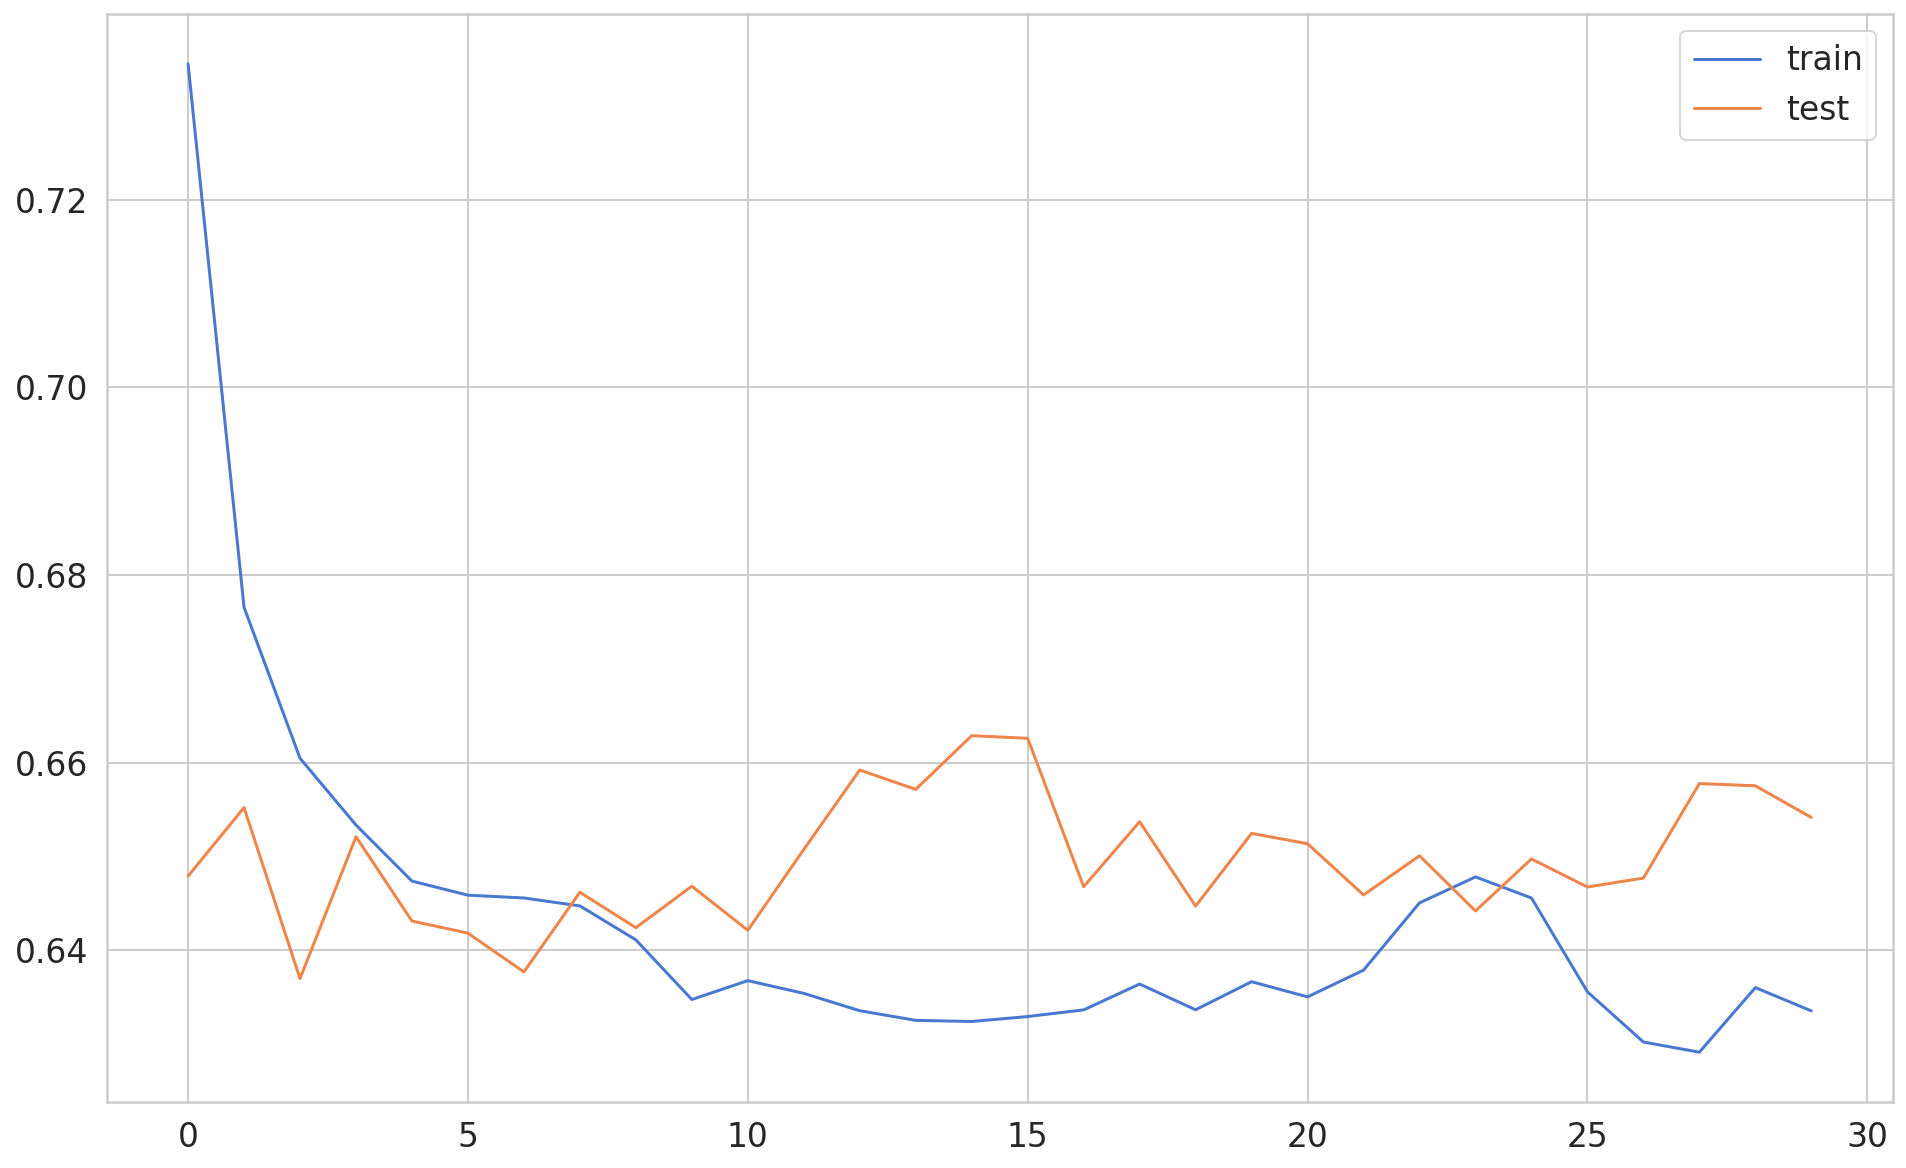

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [14]:
y_pred = model.predict(X_test)

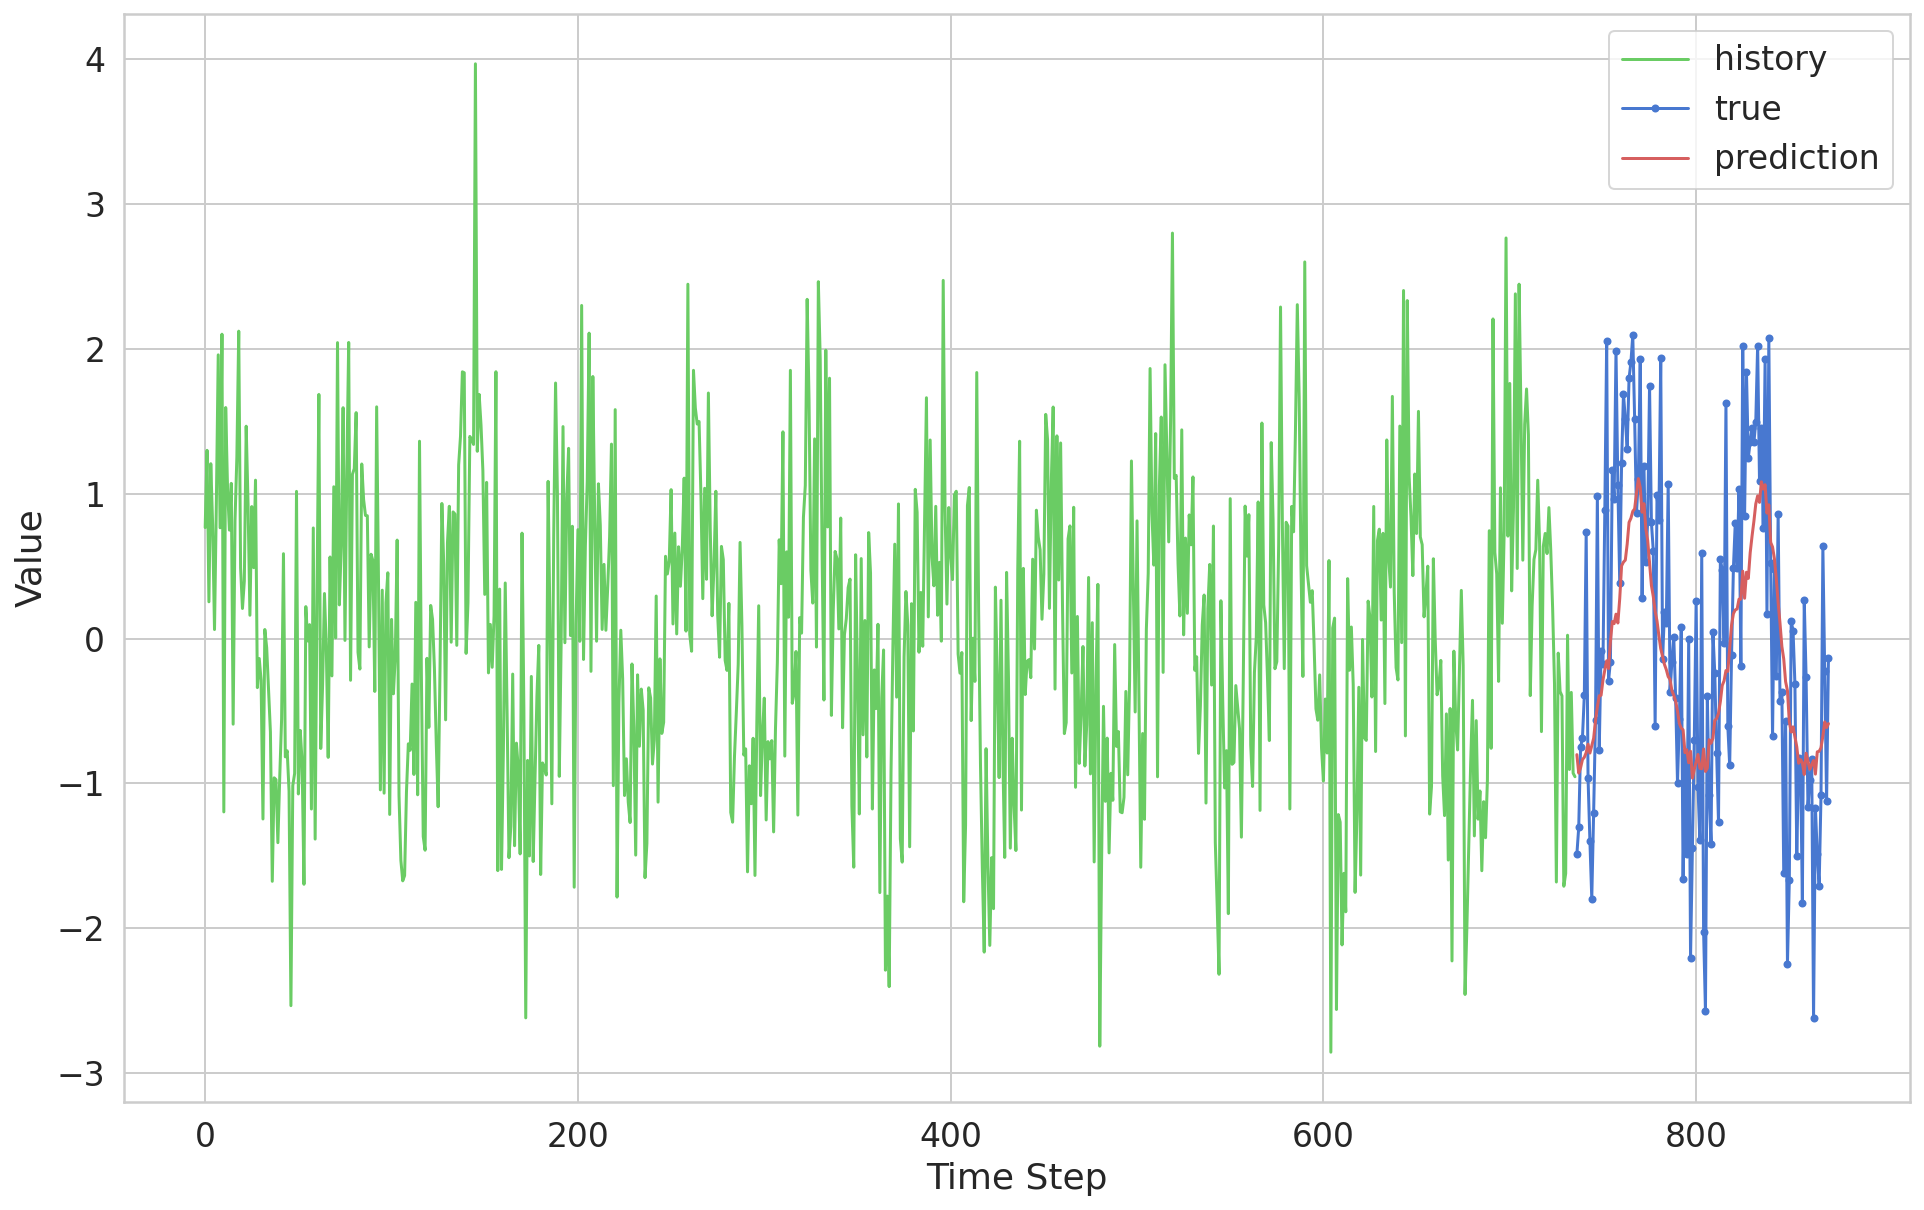

In [15]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

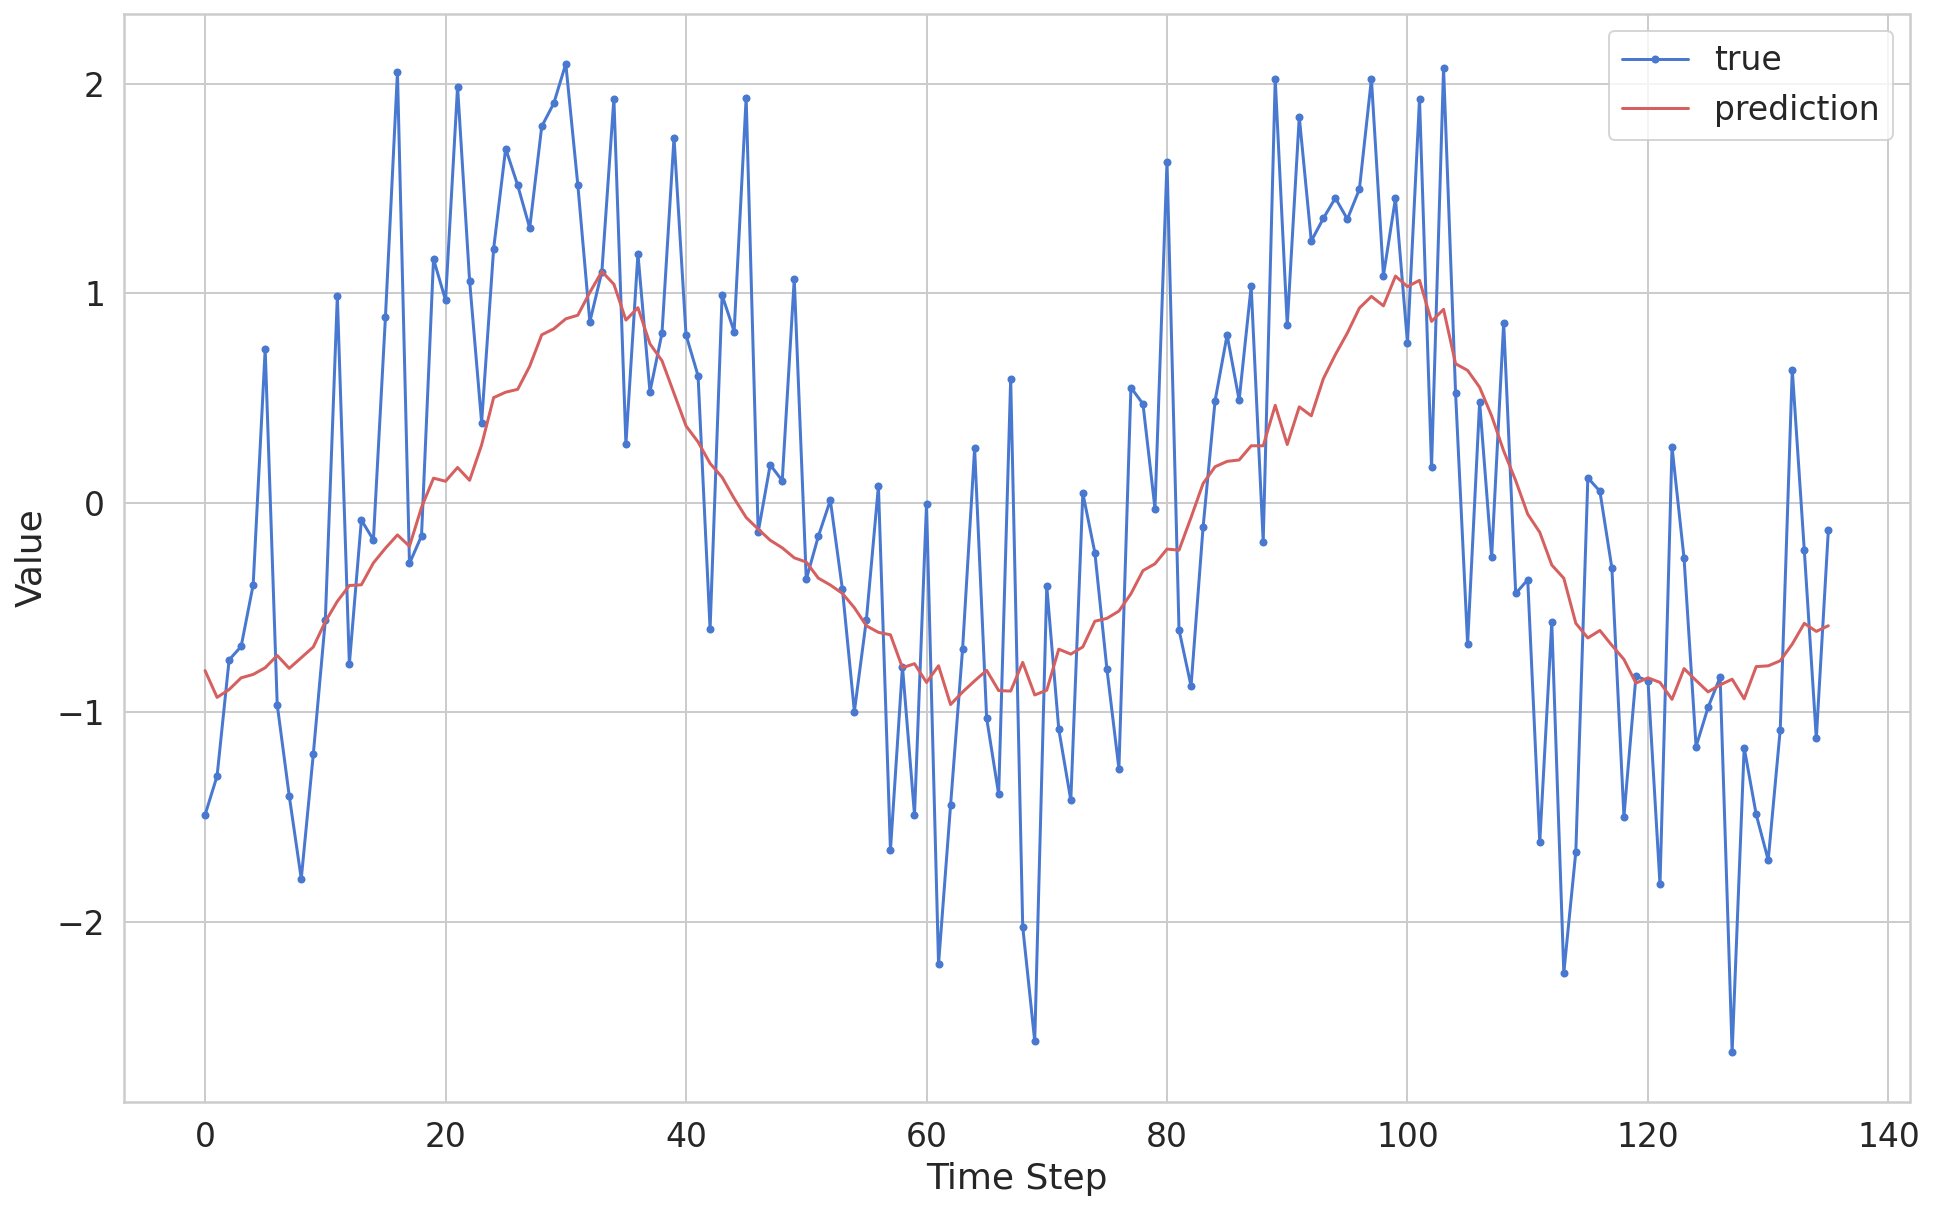

In [16]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [17]:
np.mean(np.power(y_test -y_pred,1))

0.18314084953072624